In [1]:
import numpy as np
from scipy.io import loadmat
from matplotlib.animation import FuncAnimation
from matplotlib import pyplot as plt
import skimage as sk
import pandas as pd
import time
from mpl_toolkits.mplot3d import Axes3D

## LAB 4

Variables:


In [2]:
T1 = 1500*10**-3 #s
T2 = 100*10**-3 #s
B0 = 3 #T
M0 = np.array([[0,0,1]]).transpose()
step = 0.1*10**-3 #s
gamma = 42.575 * 10**6; # gyro magnetic ratio for 1H MHz/T

### **Question 1**

Excitation (ignoring relaxation) by a 90º flip angle $B_1$ pulse along -x with  duration 10 ms.


In [3]:
duration = 10*10**-3 #s
t = np.array([np.arange(0, duration, step)])
w1 = (np.pi/2) /  duration #rad/s

R = np.array([[1,0,0],
     [0,np.cos(w1*step),-np.sin(w1*step)],
     [0,np.sin(w1*step),np.cos(w1*step)]]) #rotation matrix

M = M0

for i in np.arange(step, duration, step):
    M = np.append(M, np.dot(R, np.array([M[:,-1]]).transpose()), axis=1)
    

In [4]:
Mnet=np.array([np.sqrt(M0[0]**2 + M0[1]**2 + M0[2]**2)])
for c in range (1, M.shape[1]):
    Mnet = np.append(Mnet, np.array([[np.sqrt(M[0][c]**2 + M[1][c]**2 + M[2][c]**2)]]), axis=1)

angle = np.array([-1*np.arctan(M0[1]/M0[2])]) * 180 /np.pi
for c in range (1, M.shape[1]):
    angle = np.append(angle, np.array([[-1* (180 /np.pi) * np.arctan(M[1][c]/M[2][c])]]), axis=1)

    

The **tip angle** is defined as the angle through which the net magnetization is rotated by the action of the $B_1$ field. This angle is proportional to the product of the strength of the applied RF field and the time for which it is applied. Using this definition, it's easy to derive the product of γ and $B_1$, needed for the Bloch equations.



$
    \text{Tip angle} = γ * B_1 * \text{RF pulse duration} \Rightarrow
γ*B_1 = \frac{\text{Tip angle}} {\text{RF pulse duration}} 
$

Excitation plot:

<Figure size 640x480 with 0 Axes>

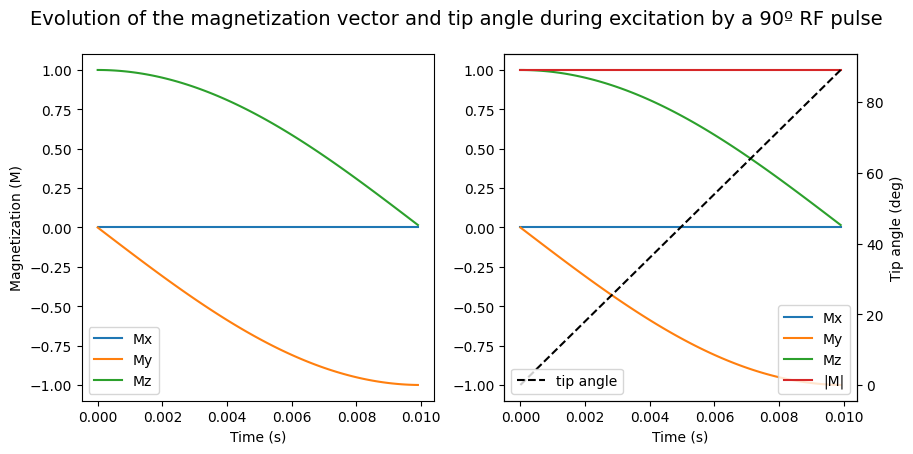

In [5]:
plt.figure()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.5))
fig.suptitle("Evolution of the magnetization vector and tip angle during excitation by a 90º RF pulse", fontsize=14)
ax1.plot(t[0], np.array([M[0,:]])[0], label='Mx')
ax1.plot(t[0], np.array([M[1,:]])[0], label='My')
ax1.plot(t[0], np.array([M[2,:]])[0], label='Mz')
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Magnetization (M)")
ax1.legend(loc='lower left')
ax2.plot(t[0], np.array([M[0,:]])[0], label='Mx')
ax2.plot(t[0], np.array([M[1,:]])[0], label='My')
ax2.plot(t[0], np.array([M[2,:]])[0], label='Mz')
ax2.plot(t[0], np.array([Mnet[0]])[0],  label='|M|')
ax2.set_xlabel("Time (s)")
#ax2.set_ylabel("Magnetization (M)")
#ax2.set_title("Evolution of the magnetization vector and tip angle during excitation by a 90º RF pulse")
plt.legend(loc='lower right')
ax21=ax2.twinx()
ax21.plot(t[0], np.array([angle[0]])[0],  label='tip angle', linestyle='dashed', color = "black")
ax21.set_ylabel("Tip angle (deg)")
plt.legend(loc='lower left')
plt.show()



Application of a $B_1$ field ($B_1$,-x) along the -x axis rotates the individual proton magnetic moments around the x axis toward the -y axis. The effect of applying the $B_1$ field about the -x axis is to create a component of magnetization My in the -y direction. A tip angle of 90° results in the maximum value of the My component, 1, while Mz decreases to 0. The magnetization net value remains the same. 

Animation


In [62]:
%matplotlib tk

fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))

def getarrow(i):
    X = 0
    Y = 0
    Z = 0
    U = M[0][i]
    V = M[1][i]
    W = M[2][i]
    return X, Y, Z, U, V, W

q1 = ax.quiver(*getarrow(0))

ax.set_xlim([0, 1])
ax.set_xlabel('X')
ax.set_ylim([-1, 0])
ax.set_ylabel('Y')
ax.set_zlim([0, 1])
ax.set_zlabel('Z')

def update1(i):
    global q1
    q1.remove()
    q1 = ax.quiver(*getarrow(i))

anim = FuncAnimation(fig, update1, frames=M[0].size, interval=50)
fig.suptitle("Rotating reference frame", fontsize=14)
plt.show()

### **Question 2**

Relaxation following the 90º excitation simulated in 1., for an observation period of
790 ms. Try also an observation period of 2990 ms.

In [7]:
%matplotlib inline

obs1 = 790*10**-3 #s
obs2 = 2990*10**-3 #s
obs3 = 7000*10**-3 #s

M_relax = np.array([M[:,-1]]).transpose()
M_relax2 = np.array([M[:,-1]]).transpose()
M_relax3 = np.array([M[:,-1]]).transpose()

relax_matrix = np.array([[np.exp(-step/T2), 0, 0],
                         [0, np.exp(-step/T2), 0],
                         [0, 0, np.exp(-step/T1)]]) #relaxation matrix


for i in np.arange(step, obs1, step):
    M_relax = np.append(M_relax, np.dot(relax_matrix, np.array([M_relax[:,-1]]).transpose()) + np.array([[0,0,(1-np.exp(-step/T1))]]).transpose(),axis=1)

for i in np.arange(step, obs2, step):
    M_relax2 = np.append(M_relax2, np.dot(relax_matrix, np.array([M_relax2[:,-1]]).transpose()) + np.array([[0,0,(1-np.exp(-step/T1))]]).transpose(),axis=1)
    
for i in np.arange(step, obs3, step):
    M_relax3 = np.append(M_relax3, np.dot(relax_matrix, np.array([M_relax3[:,-1]]).transpose()) + np.array([[0,0,(1-np.exp(-step/T1))]]).transpose(),axis=1)

In [9]:
Mnet_1=np.array([[np.sqrt(M_relax[0][0]**2 + M_relax[1][0]**2 + M_relax[2][0]**2)]])
for c in range (1, M_relax.shape[1]):
    Mnet_1 = np.append(Mnet_1, np.array([[np.sqrt(M_relax[0][c]**2 + M_relax[1][c]**2 + M_relax[2][c]**2)]]), axis=1)

angle1 = np.array([[-1*np.arctan(M_relax[1][0]/M_relax[2][0])]]) * 180 /np.pi
for c in range (1, M_relax.shape[1]):
    angle1 = np.append(angle1, np.array([[-1* (180 /np.pi) * np.arctan(M_relax[1][c]/M_relax[2][c])]]), axis=1)

Mnet_2=np.array([[np.sqrt(M_relax2[0][0]**2 + M_relax2[1][0]**2 + M_relax2[2][0]**2)]])
for c in range (1, M_relax2.shape[1]):
    Mnet_2 = np.append(Mnet_2, np.array([[np.sqrt(M_relax2[0][c]**2 + M_relax2[1][c]**2 + M_relax2[2][c]**2)]]), axis=1)
    
angle2 = np.array([[-1*np.arctan(M_relax2[1][0]/M_relax2[2][0])]]) * 180 /np.pi
for c in range (1, M_relax2.shape[1]):
    angle2 = np.append(angle2, np.array([[-1* (180 /np.pi) * np.arctan(M_relax2[1][c]/M_relax2[2][c])]]), axis=1)
    
Mnet_3=np.array([[np.sqrt(M_relax3[0][0]**2 + M_relax3[1][0]**2 + M_relax3[2][0]**2)]])
for c in range (1, M_relax3.shape[1]):
    Mnet_3 = np.append(Mnet_3, np.array([[np.sqrt(M_relax3[0][c]**2 + M_relax3[1][c]**2 + M_relax3[2][c]**2)]]), axis=1)
    
angle3 = np.array([[-1*np.arctan(M_relax3[1][0]/M_relax3[2][0])]]) * 180 /np.pi
for c in range (1, M_relax3.shape[1]):
    angle3 = np.append(angle3, np.array([[-1* (180 /np.pi) * np.arctan(M_relax3[1][c]/M_relax3[2][c])]]), axis=1)

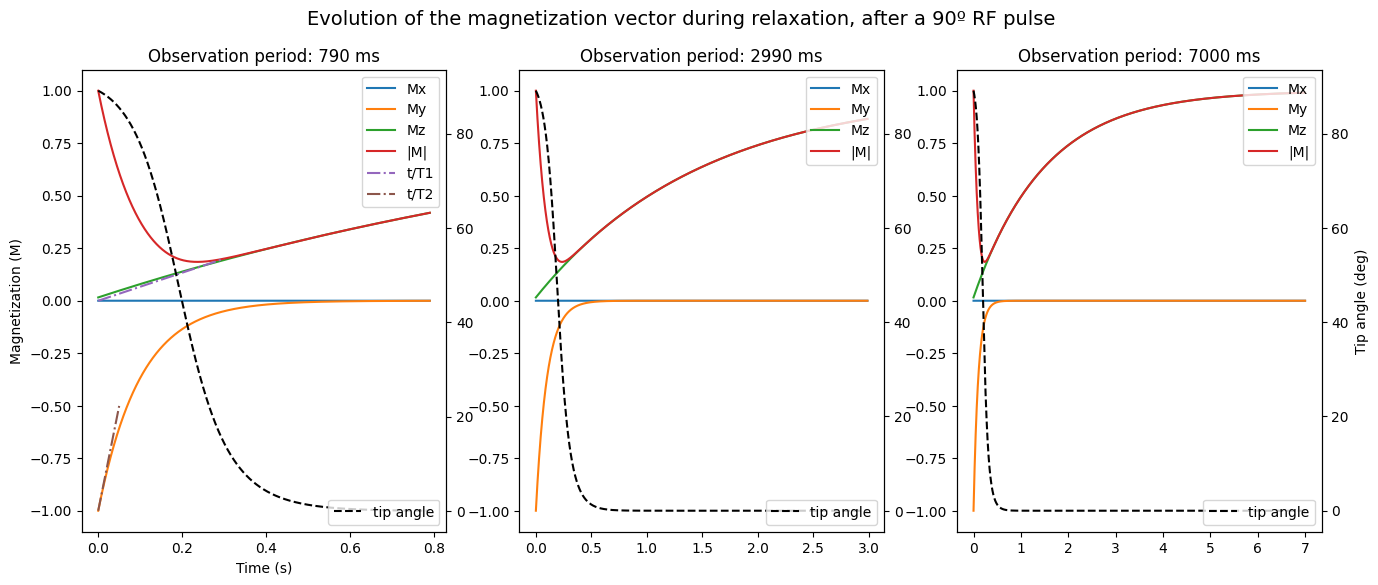

In [10]:
%matplotlib inline

t1 = np.array([np.arange(0, obs1, step)])
t2 = np.array([np.arange(0, obs2, step)])
t3 = np.array([np.arange(0, obs3, step)])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle("Evolution of the magnetization vector during relaxation, after a 90º RF pulse", fontsize=14)
ax1.plot(t1[0], np.array([M_relax[0,:]])[0], label='Mx')
ax1.plot(t1[0], np.array([M_relax[1,:]])[0], label='My')
ax1.plot(t1[0], np.array([M_relax[2,:]])[0], label='Mz')
ax1.plot(t1[0], np.array([Mnet_1[0]])[0],  label='|M|')
ax1.plot(t1[0][0:3000], np.array([t1[0]/T1])[0][0:3000], linestyle='dashdot', label = 't/T1')
ax1.plot(t1[0][0:500], np.array([-1+t1[0]/T2])[0][0:500], linestyle='dashdot', label = 't/T2')
ax1.set_title('Observation period: 790 ms')
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Magnetization (M)")
ax1.legend()
ax11=ax1.twinx()
ax11.plot(t1[0], np.array([angle1[0]])[0],  label='tip angle', linestyle='dashed', color = "black")
#ax11.set_ylabel("Tip angle (deg)")
ax11.legend(loc='lower right')
ax2.plot(t2[0], np.array([M_relax2[0,:]])[0], label='Mx')
ax2.plot(t2[0], np.array([M_relax2[1,:]])[0], label='My')
ax2.plot(t2[0], np.array([M_relax2[2,:]])[0], label='Mz')
ax2.plot(t2[0], np.array([Mnet_2[0]])[0],  label='|M|')
#ax2.plot(t2[0][0:3000], np.array([t2[0]/T1])[0][0:3000], linestyle='dashdot', label = 't/T1')
ax2.set_title('Observation period: 2990 ms')
ax2.legend(loc='upper right')
ax21=ax2.twinx()
ax21.plot(t2[0], np.array([angle2[0]])[0],  label='tip angle', linestyle='dashed', color = "black")
#ax21.set_ylabel("Tip angle (deg)")
ax21.legend(loc='lower right')

ax3.plot(t3[0], np.array([M_relax3[0,:]])[0], label='Mx')
ax3.plot(t3[0], np.array([M_relax3[1,:]])[0], label='My')
ax3.plot(t3[0], np.array([M_relax3[2,:]])[0], label='Mz')
ax3.plot(t3[0], np.array([Mnet_3[0]])[0],  label='|M|')
#ax3.plot(t3[0][0:3000], np.array([t3[0]/T1])[0][0:3000], linestyle='dashdot', label = 't/T1')
ax3.set_title('Observation period: 7000 ms')
ax3.legend(loc='upper right')
ax31=ax3.twinx()
ax31.plot(t3[0], np.array([angle3[0]])[0],  label='tip angle', linestyle='dashed', color = "black")
ax31.set_ylabel("Tip angle (deg)")
ax31.legend(loc='lower right')

Each of the magnetization components Mz, Mx, and My must return to their equilibrum value over time. The return of Mz, to its equilibrium value of M0 is governed by the spin-lattice (T1) relaxation time. Mx and My components of magnetization relax back to their thermal equilibrium values of zero with a time constant termed the spin-spin (T2) relaxation time.

**Transverse relaxation, $M_y$**: Starts at $-M_0$ (following a 90º degree excitation along -x, $M_y(0)=-M_0=-1$) and decreases exponentially with the factor $\frac{1}{T_2}$ until 0, its value in equilibrium.
<br> 
After a 90º pulse, the individual magnetic moments precess at different frequencies because they experience slightly different magnetic fields. The My component of magnetization decreases over time, and when the individual vectors are randomly distributed in the transverse plane, there is no net magnetic moment, and no signal is detected.
<br>
**Longidutinal relaxation, $M_z$**: Starts at 0 (the value of Mz after a 90º degree excitation) and increases exponentially with the factor $\frac{1}{T_1}$ untill 1, which is the return of Mz to its equilibrium value of M0.

$M_z$ increases much faster than |$M_y$| because T1>T2. This means that the relaxation is not a rotation, since Mx and Myz don't decrease/increase at the same rate, |M| is not constant.



Animation

In [11]:
%matplotlib tk

fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))

def getarrowR1(i):
    X = 0
    Y = 0
    Z = 0
    U = M_relax[0][i]
    V = M_relax[1][i]
    W = M_relax[2][i]
    return X, Y, Z, U, V, W

q2 = ax.quiver(*getarrowR1(0))

ax.set_xlim([0, 1])
ax.set_xlabel('X')
ax.set_ylim([-1, 0])
ax.set_ylabel('Y')
ax.set_zlim([0, 1])
ax.set_zlabel('Z')
ax.set_title('Relaxation following a 90 excitation, 790 ms observation period')

def update2(i):
    global q2
    q2.remove()
    q2 = ax.quiver(*getarrowR1(i))

anim = FuncAnimation(fig, update2, frames=M_relax[0].size, interval=0.0000000000000000000000000000000000000000000001)
plt.show()

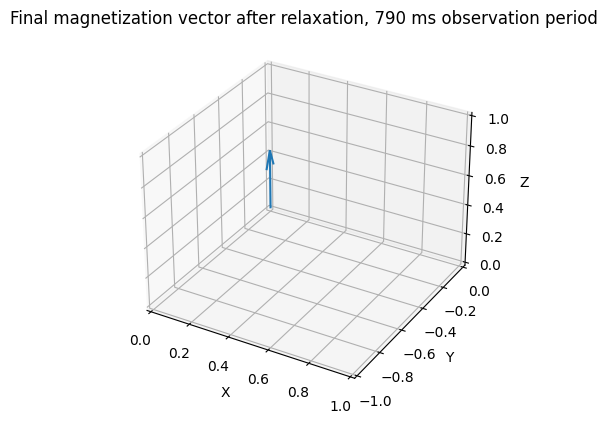

In [12]:
#plot the final quiver
%matplotlib inline

fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))

finalquiver = ax.quiver(*getarrowR1(M_relax[0].size-1))

ax.set_xlim([0, 1])
ax.set_xlabel('X')
ax.set_ylim([-1, 0])
ax.set_ylabel('Y')
ax.set_zlim([0, 1])
ax.set_zlabel('Z')

ax.set_title('Final magnetization vector after relaxation, 790 ms observation period')

plt.show()


In [14]:
%matplotlib tk

fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))

def getarrowR2(i):
    X = 0
    Y = 0
    Z = 0
    U = M_relax2[0][i]
    V = M_relax2[1][i]
    W = M_relax2[2][i]
    return X, Y, Z, U, V, W

q3 = ax.quiver(*getarrowR2(0))

ax.set_xlim([0, 1])
ax.set_xlabel('X')
ax.set_ylim([-1, 0])
ax.set_ylabel('Y')
ax.set_zlim([0, 1])
ax.set_zlabel('Z')
ax.set_title('Relaxation following a 90 excitation, 2990 ms observation period')

def update3(i):
    global q3
    q3.remove()
    q3 = ax.quiver(*getarrowR2(i))

anim = FuncAnimation(fig, update3, frames=M_relax2[0].size, interval=0.0000000000000001)
plt.show()

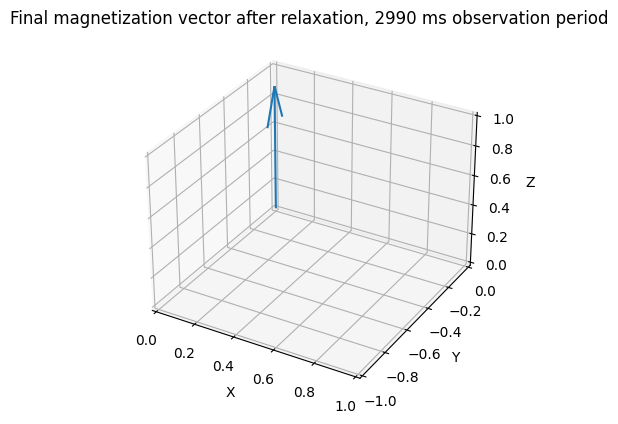

In [15]:
#plot the final quiver
%matplotlib inline

fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))

finalquiver = ax.quiver(*getarrowR2(M_relax2[0].size-1))

ax.set_xlim([0, 1])
ax.set_xlabel('X')
ax.set_ylim([-1, 0])
ax.set_ylabel('Y')
ax.set_zlim([0, 1])
ax.set_zlabel('Z')

ax.set_title('Final magnetization vector after relaxation, 2990 ms observation period')

plt.show()

In [16]:
%matplotlib tk

fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))

def getarrowR3(i):
    X = 0
    Y = 0
    Z = 0
    U = M_relax3[0][i]
    V = M_relax3[1][i]
    W = M_relax3[2][i]
    return X, Y, Z, U, V, W

q4 = ax.quiver(*getarrowR3(0))

ax.set_xlim([0, 1])
ax.set_xlabel('X')
ax.set_ylim([-1, 0])
ax.set_ylabel('Y')
ax.set_zlim([0, 1])
ax.set_zlabel('Z')
ax.set_title('Relaxation following a 90 excitation, 7000 ms observation period')

def update4(i):
    global q4
    q4.remove()
    q4 = ax.quiver(*getarrowR3(i))

anim = FuncAnimation(fig, update4, frames=M_relax3[0].size, interval=0.000000000000000000001)
plt.show()

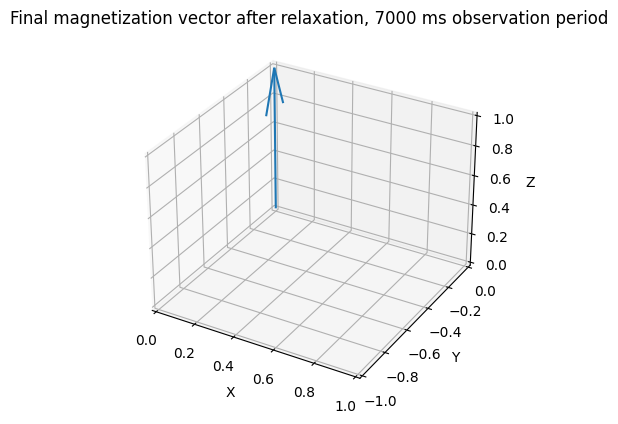

In [17]:
#plot the final quiver
%matplotlib inline

fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))

finalquiver = ax.quiver(*getarrowR3(M_relax3[0].size-1))

ax.set_xlim([0, 1])
ax.set_xlabel('X')
ax.set_ylim([-1, 0])
ax.set_ylabel('Y')
ax.set_zlim([0, 1])
ax.set_zlabel('Z')

ax.set_title('Final magnetization vector after relaxation, 7000 ms observation period')

plt.show()

### Question 3 ###

Repeat 1. 2. for the flip angles 45º and 180º.

Flip angle: 45º

In [18]:
w45 = (np.pi/4) /  duration #rad/s

R = np.array([[1,0,0],
     [0,np.cos(w45*step),-np.sin(w45*step)],
     [0,np.sin(w45*step),np.cos(w45*step)]]) #rotation matrix

M45 = M0

for i in np.arange(step, duration, step):
    M45 = np.append(M45, np.dot(R, np.array([M45[:,-1]]).transpose()), axis=1)

In [19]:
Mnet45=np.array([np.sqrt(M0[0]**2 + M0[1]**2 + M0[2]**2)])
for c in range (1, M45.shape[1]):
    Mnet45 = np.append(Mnet45, np.array([[np.sqrt(M45[0][c]**2 + M45[1][c]**2 + M45[2][c]**2)]]), axis=1)

angle45 = np.array([-1*np.arctan(M0[1]/M0[2])]) * 180 /np.pi
for c in range (1, M45.shape[1]):
    angle45 = np.append(angle45, np.array([[-1* (180 /np.pi) * np.arctan(M45[1][c]/M45[2][c])]]), axis=1)

<Figure size 640x480 with 0 Axes>

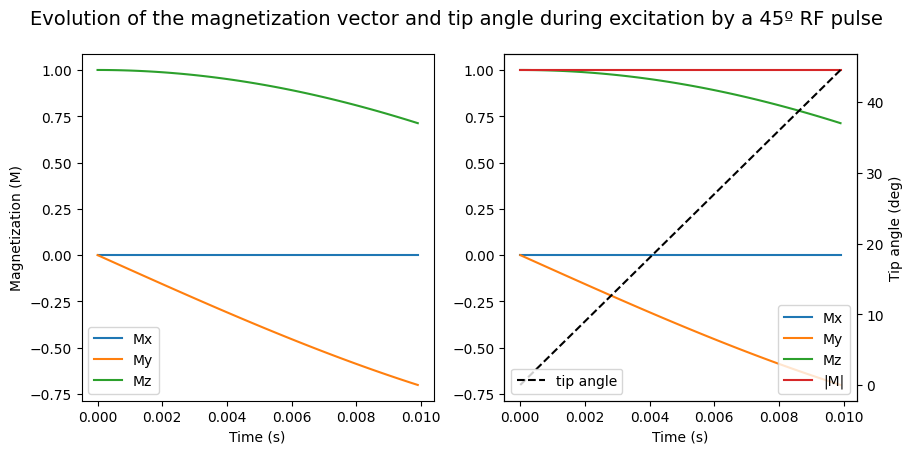

In [20]:
%matplotlib inline

plt.figure()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.5))
fig.suptitle("Evolution of the magnetization vector and tip angle during excitation by a 45º RF pulse", fontsize=14)
ax1.plot(t[0], np.array([M45[0,:]])[0], label='Mx')
ax1.plot(t[0], np.array([M45[1,:]])[0], label='My')
ax1.plot(t[0], np.array([M45[2,:]])[0], label='Mz')
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Magnetization (M)")
ax1.legend(loc='lower left')
ax2.plot(t[0], np.array([M45[0,:]])[0], label='Mx')
ax2.plot(t[0], np.array([M45[1,:]])[0], label='My')
ax2.plot(t[0], np.array([M45[2,:]])[0], label='Mz')
ax2.plot(t[0], np.array([Mnet45[0]])[0],  label='|M|')
ax2.set_xlabel("Time (s)")
#ax2.set_ylabel("Magnetization (M)")
#ax2.set_title("Evolution of the magnetization vector and tip angle during excitation by a 45º RF pulse")
plt.legend(loc='lower right')
ax21=ax2.twinx()
ax21.plot(t[0], np.array([angle45[0]])[0],  label='tip angle', linestyle='dashed', color = "black")
ax21.set_ylabel("Tip angle (deg)")
plt.legend(loc='lower left')
plt.show()

Animation of excitation

In [21]:
%matplotlib tk

fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))

def getarrow(i):
    X = 0
    Y = 0
    Z = 0
    U = M45[0][i]
    V = M45[1][i]
    W = M45[2][i]
    return X, Y, Z, U, V, W

q5 = ax.quiver(*getarrow(0))

ax.set_xlim([0, 1])
ax.set_xlabel('X')
ax.set_ylim([-1, 0])
ax.set_ylabel('Y')
ax.set_zlim([0, 1])
ax.set_zlabel('Z')
ax.set_title('Excitation by a 45º tip angle')

def update5(i):
    global q5
    q5.remove()
    q5 = ax.quiver(*getarrow(i))

anim = FuncAnimation(fig, update5, frames=M45[0].size, interval=50)
plt.show()

In [22]:
obs1 = 790*10**-3 #s
obs2 = 2990*10**-3 #s

M_relax45 = np.array([M45[:,-1]]).transpose()
M_relax45_2 = np.array([M45[:,-1]]).transpose()


for i in np.arange(step, obs1, step):
    M_relax45 = np.append(M_relax45, np.dot(relax_matrix, np.array([M_relax45[:,-1]]).transpose()) + np.array([[0,0,(1-np.exp(-step/T1))]]).transpose(),axis=1)

for i in np.arange(step, obs2, step):
    M_relax45_2 = np.append(M_relax45_2, np.dot(relax_matrix, np.array([M_relax45_2[:,-1]]).transpose()) + np.array([[0,0,(1-np.exp(-step/T1))]]).transpose(),axis=1)

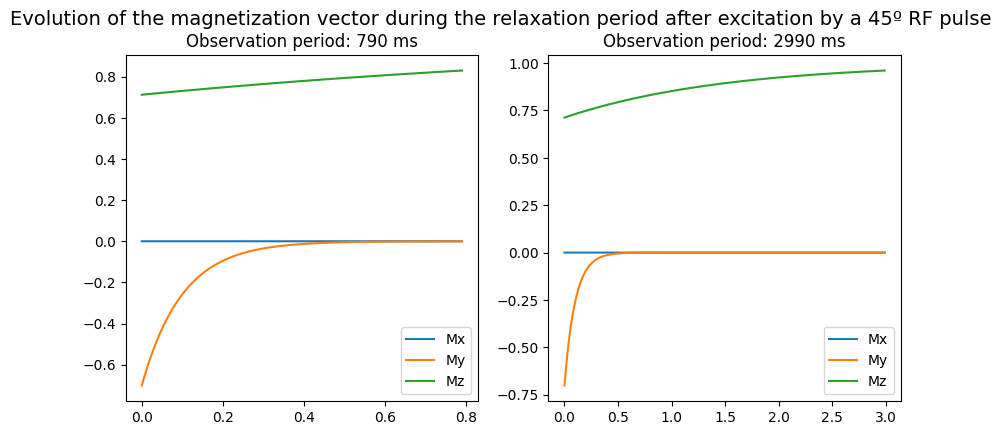

In [23]:
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.5))
ax1.plot(t1[0], np.array([M_relax45[0,:]])[0], label='Mx')
ax1.plot(t1[0], np.array([M_relax45[1,:]])[0], label='My')
ax1.plot(t1[0], np.array([M_relax45[2,:]])[0], label='Mz')
ax1.set_title('Observation period: 790 ms')
ax1.legend()
ax2.plot(t2[0], np.array([M_relax45_2[0,:]])[0], label='Mx')
ax2.plot(t2[0], np.array([M_relax45_2[1,:]])[0], label='My')
ax2.plot(t2[0], np.array([M_relax45_2[2,:]])[0], label='Mz')
ax2.set_title('Observation period: 2990 ms')
fig.suptitle("Evolution of the magnetization vector during the relaxation period after excitation by a 45º RF pulse", fontsize=14)
ax2.legend()

In [25]:
%matplotlib tk

fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))

def getarrowR45(i):
    X = 0
    Y = 0
    Z = 0
    U = M_relax45_2[0][i]
    V = M_relax45_2[1][i]
    W = M_relax45_2[2][i]
    return X, Y, Z, U, V, W

q7 = ax.quiver(*getarrowR45(0))

ax.set_xlim([0, 1])
ax.set_xlabel('X')
ax.set_ylim([-1, 0])
ax.set_ylabel('Y')
ax.set_zlim([-1, 1])
ax.set_zlabel('Z')
ax.set_title('Relaxtion after a 45º tip angle')

def update7(i):
    global q7
    q7.remove()
    q7 = ax.quiver(*getarrowR45(i))

anim = FuncAnimation(fig, update7, frames=M_relax45_2[0].size, interval=0.000000000000000000000000000000001)
plt.show()

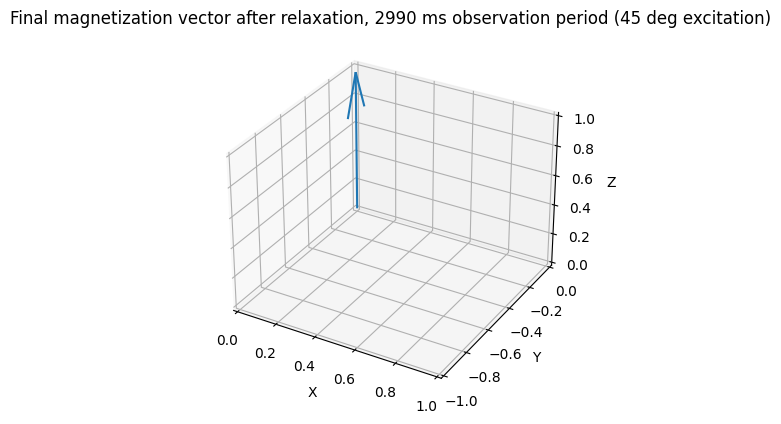

In [26]:
#plot the final quiver
%matplotlib inline

fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))

finalquiver = ax.quiver(*getarrowR45(M_relax45_2[0].size-1))

ax.set_xlim([0, 1])
ax.set_xlabel('X')
ax.set_ylim([-1, 0])
ax.set_ylabel('Y')
ax.set_zlim([0, 1])
ax.set_zlabel('Z')

ax.set_title('Final magnetization vector after relaxation, 2990 ms observation period (45 deg excitation)')

plt.show()

Flip angle: 180º

In [27]:
w180 = (np.pi) /  duration #rad/s

R = np.array([[1,0,0],
     [0,np.cos(w180*step),-np.sin(w180*step)],
     [0,np.sin(w180*step),np.cos(w180*step)]]) #rotation matrix

M180 = M0

for i in np.arange(step, duration, step):
    M180 = np.append(M180, np.dot(R, np.array([M180[:,-1]]).transpose()), axis=1)

Mnet180=np.array([np.sqrt(M0[0]**2 + M0[1]**2 + M0[2]**2)])
for c in range (1, M180.shape[1]):
    Mnet180 = np.append(Mnet180, np.array([[np.sqrt(M180[0][c]**2 + M180[1][c]**2 + M180[2][c]**2)]]), axis=1)

angle180 = np.array([-1*np.arctan(M0[1]/M0[2])]) * 180 /np.pi
for c in range (1, M180.shape[1]):
    angle180 = np.append(angle180, np.array([[-1* (180 /np.pi) * np.arctan(M180[1][c]/M180[2][c])]]), axis=1)

<Figure size 640x480 with 0 Axes>

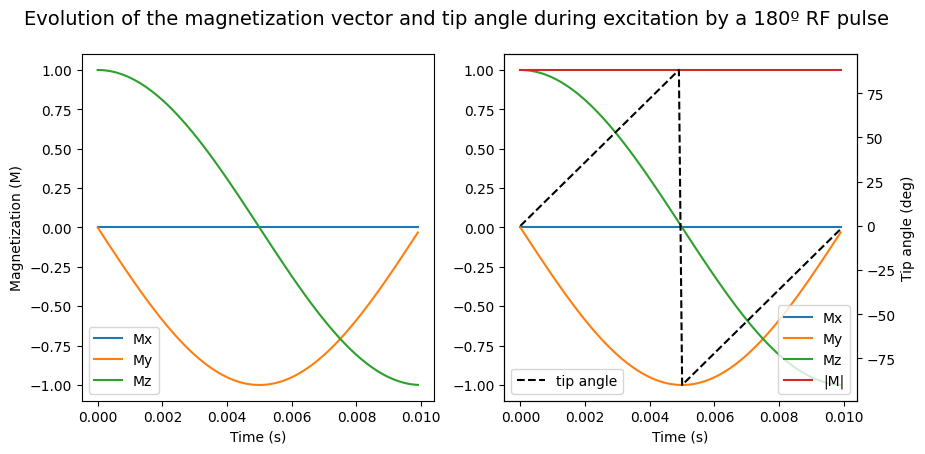

In [28]:
plt.figure()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.5))
fig.suptitle("Evolution of the magnetization vector and tip angle during excitation by a 180º RF pulse", fontsize=14)
ax1.plot(t[0], np.array([M180[0,:]])[0], label='Mx')
ax1.plot(t[0], np.array([M180[1,:]])[0], label='My')
ax1.plot(t[0], np.array([M180[2,:]])[0], label='Mz')
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Magnetization (M)")
ax1.legend(loc='lower left')
ax2.plot(t[0], np.array([M180[0,:]])[0], label='Mx')
ax2.plot(t[0], np.array([M180[1,:]])[0], label='My')
ax2.plot(t[0], np.array([M180[2,:]])[0], label='Mz')
ax2.plot(t[0], np.array([Mnet180[0]])[0],  label='|M|')
ax2.set_xlabel("Time (s)")
#ax2.set_ylabel("Magnetization (M)")
#ax2.set_title("Evolution of the magnetization vector and tip angle during excitation by a 45º RF pulse")
plt.legend(loc='lower right')
ax21=ax2.twinx()
ax21.plot(t[0], np.array([angle180[0]])[0],  label='tip angle', linestyle='dashed', color = "black")
ax21.set_ylabel("Tip angle (deg)")
plt.legend(loc='lower left')
plt.show()

Animation excitation

In [29]:
%matplotlib tk

fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))

def getarrow(i):
    X = 0
    Y = 0
    Z = 0
    U = M180[0][i]
    V = M180[1][i]
    W = M180[2][i]
    return X, Y, Z, U, V, W

q6 = ax.quiver(*getarrow(0))

ax.set_xlim([0, 1])
ax.set_xlabel('X')
ax.set_ylim([-1, 0])
ax.set_ylabel('Y')
ax.set_zlim([-1, 1])
ax.set_zlabel('Z')
ax.set_title('Excitation by a 180º tip angle')

def update6(i):
    global q6
    q6.remove()
    q6 = ax.quiver(*getarrow(i))

anim = FuncAnimation(fig, update6, frames=M180[0].size, interval=50)
plt.show()

In [30]:
M_relax180 = np.array([M180[:,-1]]).transpose()
M_relax180_2 = np.array([M180[:,-1]]).transpose()


for i in np.arange(step, obs1, step):
    M_relax180 = np.append(M_relax180, np.dot(relax_matrix, np.array([M_relax180[:,-1]]).transpose()) + np.array([[0,0,(1-np.exp(-step/T1))]]).transpose(),axis=1)

for i in np.arange(step, obs2, step):
    M_relax180_2 = np.append(M_relax180_2, np.dot(relax_matrix, np.array([M_relax180_2[:,-1]]).transpose()) + np.array([[0,0,(1-np.exp(-step/T1))]]).transpose(),axis=1)

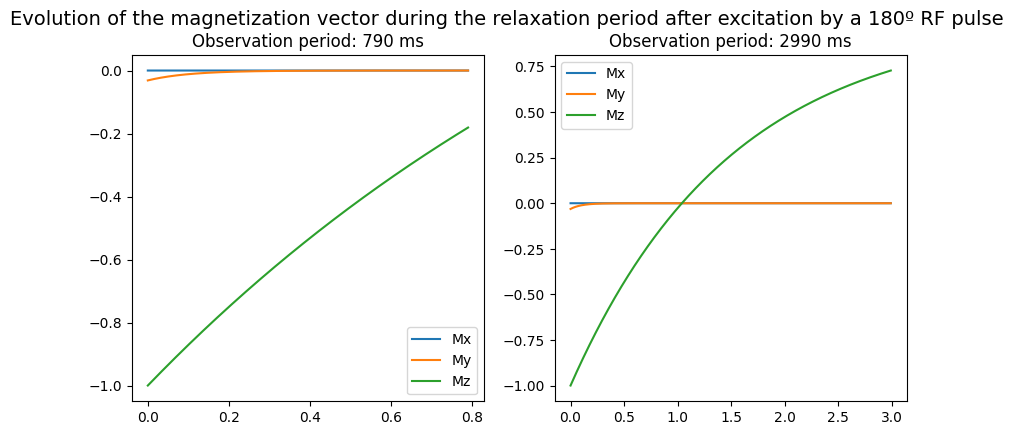

In [31]:
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.5))
ax1.plot(t1[0], np.array([M_relax180[0,:]])[0], label='Mx')
ax1.plot(t1[0], np.array([M_relax180[1,:]])[0], label='My')
ax1.plot(t1[0], np.array([M_relax180[2,:]])[0], label='Mz')
ax1.set_title('Observation period: 790 ms')
ax1.legend()
ax2.plot(t2[0], np.array([M_relax180_2[0,:]])[0], label='Mx')
ax2.plot(t2[0], np.array([M_relax180_2[1,:]])[0], label='My')
ax2.plot(t2[0], np.array([M_relax180_2[2,:]])[0], label='Mz')
ax2.set_title('Observation period: 2990 ms')
fig.suptitle("Evolution of the magnetization vector during the relaxation period after excitation by a 180º RF pulse", fontsize=14)
ax2.legend()

In [32]:
%matplotlib tk

fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))

def getarrowR180(i):
    X = 0
    Y = 0
    Z = 0
    U = M_relax180_2[0][i]
    V = M_relax180_2[1][i]
    W = M_relax180_2[2][i]
    return X, Y, Z, U, V, W

q8 = ax.quiver(*getarrowR180(0))

ax.set_xlim([0, 1])
ax.set_xlabel('X')
ax.set_ylim([-1, 0])
ax.set_ylabel('Y')
ax.set_zlim([-1, 1])
ax.set_zlabel('Z')
ax.set_title('Relaxation after excitation by a 180º tip angle')

def update8(i):
    global q8
    q8.remove()
    q8 = ax.quiver(*getarrowR180(i))

anim = FuncAnimation(fig, update8, frames=M_relax180_2[0].size, interval=0.000000000000000000000000000000001)
plt.show()

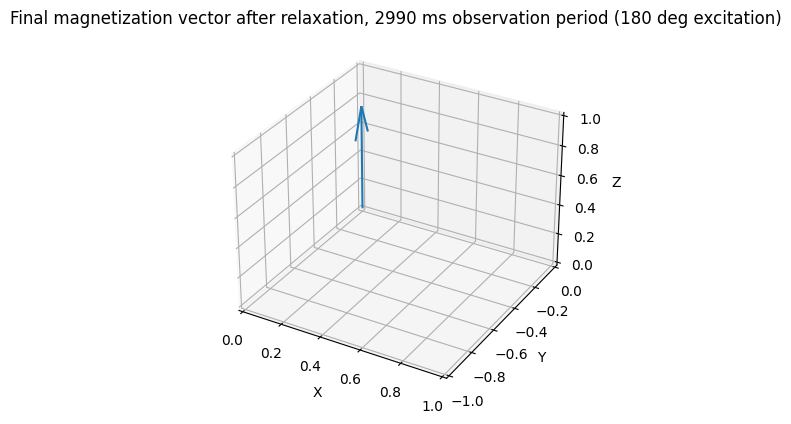

In [33]:
#plot the final quiver
%matplotlib inline

fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))

finalquiver = ax.quiver(*getarrowR180(M_relax180_2[0].size-1))

ax.set_xlim([0, 1])
ax.set_xlabel('X')
ax.set_ylim([-1, 0])
ax.set_ylabel('Y')
ax.set_zlim([0, 1])
ax.set_zlabel('Z')

ax.set_title('Final magnetization vector after relaxation, 2990 ms observation period (180 deg excitation)')

plt.show()

The larger the excitation (up to 180 deg), for the same period of observation of relaxation, the Mz will be further way from its value of 1. For a larger tip angles (up to 180) it takes longer for equilibrium to be reached again.

Excitation graphs for 45º, 90º and 180º

(-1.1, 1.1)

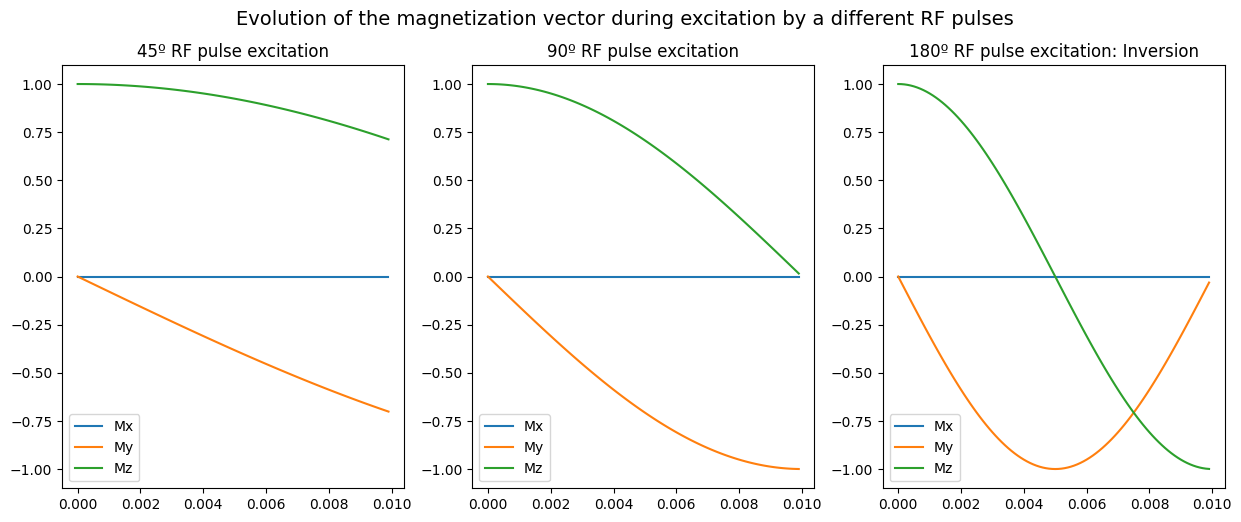

In [34]:
# plot excitation graphs for 45, 90 and 180 degrees
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(15, 5.5))
fig.suptitle("Evolution of the magnetization vector during excitation by a different RF pulses", fontsize=14)
ax1.plot(t[0], np.array([M45[0,:]])[0], label='Mx')
ax1.plot(t[0], np.array([M45[1,:]])[0], label='My')
ax1.plot(t[0], np.array([M45[2,:]])[0], label='Mz')
ax1.set_title('45º RF pulse excitation')
ax1.legend()
ax1.set_ylim([-1.10, 1.10])
ax2.plot(t[0], np.array([M[0,:]])[0], label='Mx')
ax2.plot(t[0], np.array([M[1,:]])[0], label='My')
ax2.plot(t[0], np.array([M[2,:]])[0], label='Mz')
ax2.set_title('90º RF pulse excitation')
ax2.legend(loc="lower left")
ax2.set_ylim([-1.10, 1.10])
ax3.plot(t[0], np.array([M180[0,:]])[0], label='Mx')
ax3.plot(t[0], np.array([M180[1,:]])[0], label='My')
ax3.plot(t[0], np.array([M180[2,:]])[0], label='Mz')
ax3.set_title('180º RF pulse excitation: Inversion')
ax3.legend(loc="lower left")
ax3.set_ylim([-1.10, 1.10])


While the value of My with a 90 degree RF pulse reaches 1, with a 45 degree pulse it only reaches sin(45), roughly 0.70. For a pulse of 180 degrees, My ranges from its minimum (0) and maximum (-1) values while the tip angle increases until 90 degree, once it surpasses this value, My returns to 0. Aditionally, for this last case Mz decreases from M0 (1) until -M0 (-1), given that it becomes negative once the tip angle passes 45 degrees. 

Relaxation graphs for 45, 90 and 180 degrees with an observation period of 790 ms

(-1.1, 1.1)

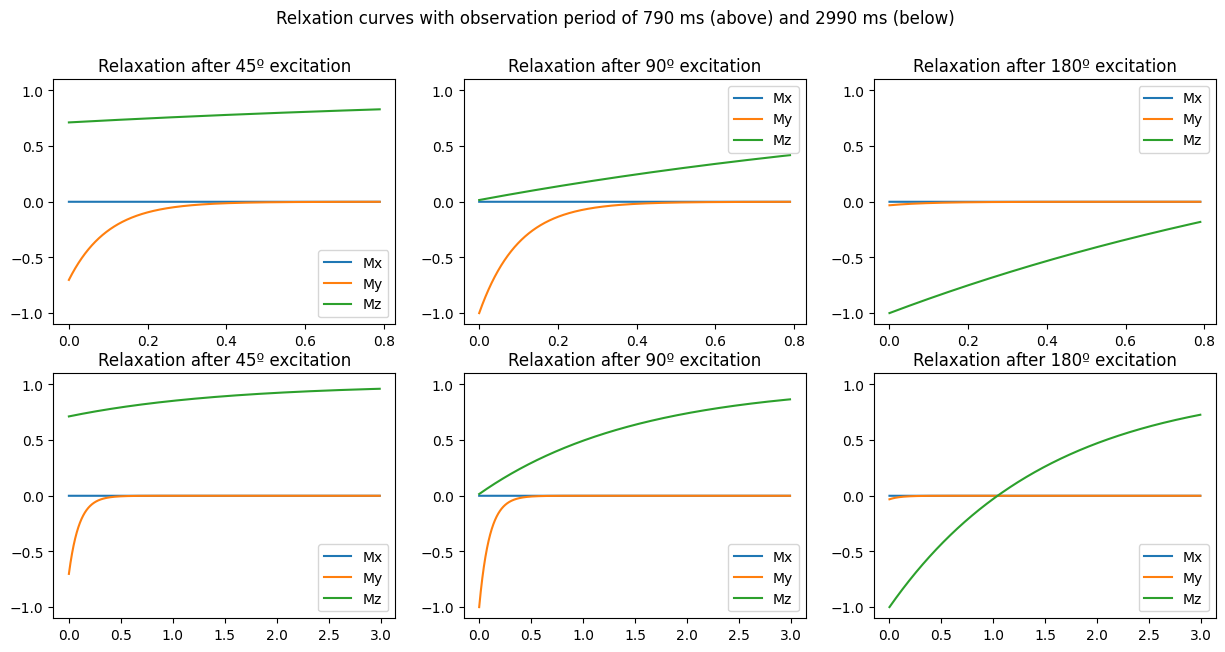

In [35]:
%matplotlib inline


# relaxation curves for 45, 90 and 180 degrees with observation period of 790 ms
fig, axes = plt.subplots(2, 3, figsize=(15, 7))
ax1,ax2,ax3,ax4,ax5,ax6 = axes.flatten()
fig.suptitle('Relxation curves with observation period of 790 ms (above) and 2990 ms (below)')
ax1.plot(t1[0], np.array([M_relax45[0,:]])[0], label='Mx')
ax1.plot(t1[0], np.array([M_relax45[1,:]])[0], label='My')
ax1.plot(t1[0], np.array([M_relax45[2,:]])[0], label='Mz')
ax1.set_title('Relaxation after 45º excitation')
ax1.legend()
ax1.set_ylim([-1.10, 1.10])
ax2.plot(t1[0], np.array([M_relax[0,:]])[0], label='Mx')
ax2.plot(t1[0], np.array([M_relax[1,:]])[0], label='My')
ax2.plot(t1[0], np.array([M_relax[2,:]])[0], label='Mz')
ax2.set_title('Relaxation after 90º excitation')
ax2.legend()
ax2.set_ylim([-1.10, 1.10])
ax3.plot(t1[0], np.array([M_relax180[0,:]])[0], label='Mx')
ax3.plot(t1[0], np.array([M_relax180[1,:]])[0], label='My')
ax3.plot(t1[0], np.array([M_relax180[2,:]])[0], label='Mz')
ax3.set_title('Relaxation after 180º excitation')
ax3.legend()
ax3.set_ylim([-1.10, 1.10])
ax4.plot(t2[0], np.array([M_relax45_2[0,:]])[0], label='Mx')
ax4.plot(t2[0], np.array([M_relax45_2[1,:]])[0], label='My')
ax4.plot(t2[0], np.array([M_relax45_2[2,:]])[0], label='Mz')
ax4.set_title('Relaxation after 45º excitation')
ax4.legend()
ax4.set_ylim([-1.10, 1.10])
ax5.plot(t2[0], np.array([M_relax2[0,:]])[0], label='Mx')
ax5.plot(t2[0], np.array([M_relax2[1,:]])[0], label='My')
ax5.plot(t2[0], np.array([M_relax2[2,:]])[0], label='Mz')
ax5.set_title('Relaxation after 90º excitation')
ax5.legend(loc = "lower right")
ax5.set_ylim([-1.10, 1.10])
ax6.plot(t2[0], np.array([M_relax180_2[0,:]])[0], label='Mx')
ax6.plot(t2[0], np.array([M_relax180_2[1,:]])[0], label='My')
ax6.plot(t2[0], np.array([M_relax180_2[2,:]])[0], label='Mz')
ax6.set_title('Relaxation after 180º excitation')
ax6.legend(loc = "lower right")
ax6.set_ylim([-1.10, 1.10])

The larger the excitation (up to 180 deg), for the same period of observation of relaxation, the Mz will be further way from its value of 1. For a larger tip angles (up to 180) it takes longer for equilibrium to be reached again.

**Transverse relaxation, $M_y$**: Starts at $M_y(0)$ and decreases exponentially with the factor $\frac{1}{T_2}$ until 0, its value in equilibrium
- Following a 45 degree excitation, $|M_y(0)|=sin(45º)=0.70$. 
- Following a 90 degree excitation, $M_y(0)=-M_0=-1$.
- Following an inversion (180 degree excitation), $M_y(0)=0$. 

**Longidutinal relaxation, $M_z$**: Starts at M_z(0) and increases exponentially with the factor $\frac{1}{T_1}$ untill 1, which is the return of Mz to its equilibrium value of M0.
- Following a 45 degree excitation, $M_z(0)= cos(45º)=0.70$. 
- Following a 90 degree excitation, $M_z(0)=0$.
- Following an inversion (180 degree excitation), $M_z(0)=-M_0$. 
<br>

Now repeat 3. for a flip angle of 45º, over 10 consecutive cycles of excitation and relaxation (repetition time (TR) = 800 ms).

In [36]:
TR = (800*10**-3)*10 #s

The repetition time (TR) is the length of time between corresponding consecutive points on a repeating series of pulses and echoes.

In [41]:
M45x10 = M0

R = np.array([[1,0,0],
     [0,np.cos(w45*step),-np.sin(w45*step)],
     [0,np.sin(w45*step),np.cos(w45*step)]]) #rotation matrix


for i in range(0,10):
    if i==0:
        for j in np.arange(step, duration, step):
            M45x10 = np.append(M45x10, np.dot(R, np.array([M45x10[:,-1]]).transpose()), axis=1)
        for k in np.arange(0, obs1, step):
            M45x10 = np.append(M45x10, np.dot(relax_matrix, np.array([M45x10[:,-1]]).transpose()) + np.array([[0,0,(1-np.exp(-step/T1))]]).transpose(),axis=1)
    else:
        for j in np.arange(0, duration, step):
            M45x10 = np.append(M45x10, np.dot(R, np.array([M45x10[:,-1]]).transpose()), axis=1)
        for k in np.arange(0, obs1, step):
            M45x10 = np.append(M45x10, np.dot(relax_matrix, np.array([M45x10[:,-1]]).transpose()) + np.array([[0,0,(1-np.exp(-step/T1))]]).transpose(),axis=1)
        


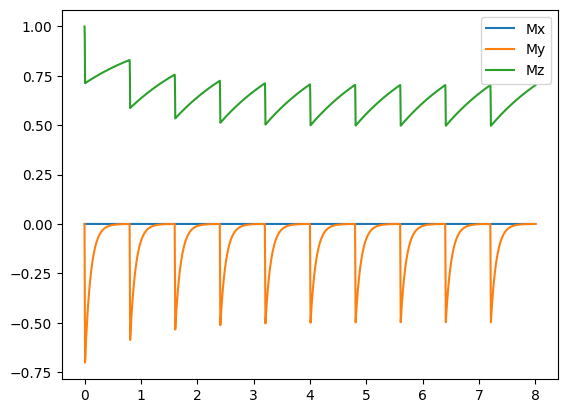

In [38]:
%matplotlib inline

TR_vec = np.array([np.arange(0,TR,step)])

plt.figure()
plt.plot(TR_vec[0], np.array([M45x10[0,:]])[0], label='Mx')
plt.plot(TR_vec[0], np.array([M45x10[1,:]])[0], label='My')
plt.plot(TR_vec[0], np.array([M45x10[2,:]])[0], label='Mz')
plt.legend()
plt.show()

Animation

In [42]:
%matplotlib tk

fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))

def getarrow10(i):
    X = 0
    Y = 0
    Z = 0
    U = M45x10[0][i]
    V = M45x10[1][i]
    W = M45x10[2][i]
    return X, Y, Z, U, V, W

q9 = ax.quiver(*getarrow10(0))

ax.set_xlim([0, 1])
ax.set_xlabel('X')
ax.set_ylim([-1, 0])
ax.set_ylabel('Y')
ax.set_zlim([0, 1])
ax.set_zlabel('Z')
ax.set_title('10 consecutive cycles')

def update9(i):
    global q9
    q9.remove()
    q9 = ax.quiver(*getarrow10(i))

anim = FuncAnimation(fig, update9, frames=M45x10[0].size, interval=0.000000000000000000000000000000000000000000000000000000000000000000000001)
plt.show()

In [43]:
M45x10_2 = M0

R = np.array([[1,0,0],
     [0,np.cos(w45*step),-np.sin(w45*step)],
     [0,np.sin(w45*step),np.cos(w45*step)]]) #rotation matrix


for i in range(0,10):
    if i==0:
        for j in np.arange(step, duration, step):
            M45x10_2 = np.append(M45x10_2, np.dot(R, np.array([M45x10_2[:,-1]]).transpose()), axis=1)
        for k in np.arange(0, obs2, step):
            M45x10_2 = np.append(M45x10_2, np.dot(relax_matrix, np.array([M45x10_2[:,-1]]).transpose()) + np.array([[0,0,(1-np.exp(-step/T1))]]).transpose(),axis=1)
    else:
        for j in np.arange(0, duration, step):
            M45x10_2 = np.append(M45x10_2, np.dot(R, np.array([M45x10_2[:,-1]]).transpose()), axis=1)
        for k in np.arange(0, obs2, step):
            M45x10_2 = np.append(M45x10_2, np.dot(relax_matrix, np.array([M45x10_2[:,-1]]).transpose()) + np.array([[0,0,(1-np.exp(-step/T1))]]).transpose(),axis=1)
        